In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [175]:
original_df = pd.read_csv('data/train.csv') 

df = original_df.copy()
df.head(3)
df.info()

df.date = df.date.apply(lambda x: str(x)[:-3])
df = df.groupby('date')['sales'].sum().reset_index()
df.date = pd.to_datetime(df.date)

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382


In [176]:
original_df.date = pd.to_datetime(original_df.date)
number_of_days = (original_df.date.max()-original_df.date.min())
number_of_years = number_of_days.days/365

fig, ax = plt.subplots(figsize=(12,6))
plt.hist(original_df.sales, color='blue')
ax.set(xlabel = "Vendas por dia", ylabel = "Numero", title = "Distribuição das vendas por dia")

plt.savefig('images/histograma_distribuicao_vendas.png', format='png')

c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Overall average monthly sales: $795075.2
Last 12 months average monthly sales: $894478.3333333334


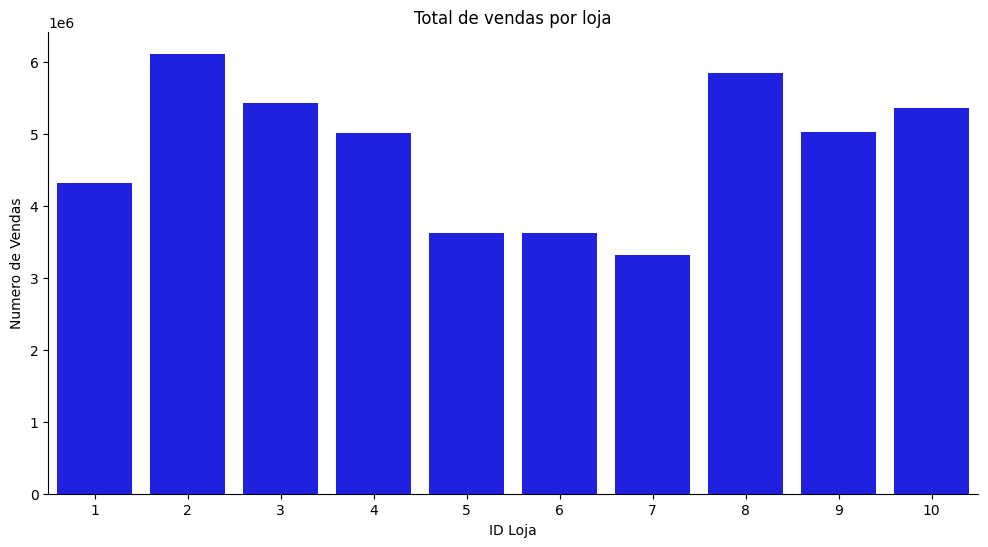

In [ ]:
original_df
df_per_store = original_df.groupby('store')['sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=df_per_store.store, y=df_per_store.sales, color='blue')
ax.set(xlabel = "ID Loja", ylabel = "Numero de Vendas",title = "Total de vendas por loja")
sns.despine()

plt.savefig('images/total_de_vendas_por_loja.png', format='png')

avg_monthly_sales = df.sales.mean()
print(f"Overall average monthly sales: ${avg_monthly_sales}")
avg_monthly_sales_12month = df.sales[-12:].mean()
print(f"Last 12 months average monthly sales: ${avg_monthly_sales_12month}")

c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

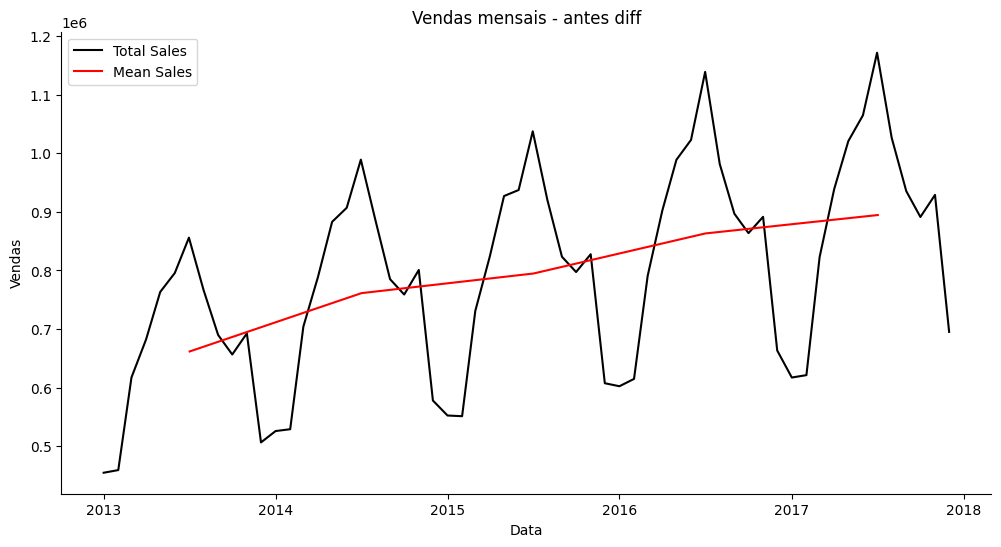

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='date', y='sales', data=df, ax=ax, color='black', label='Total Sales')

second = df.groupby(df.date.dt.year)['sales'].mean().reset_index()
second.date = pd.to_datetime(second.date, format='%Y')
sns.lineplot(x=(second.date + datetime.timedelta(6*365/12)), y='sales', data=second, ax=ax, color='red', label='Mean Sales')   

ax.set(xlabel = "Data", ylabel = "Vendas", title = "Vendas mensais - antes diff")
sns.despine()

plt.savefig('images/vendas_mensais_antes_diff.png', format='png')

In [ ]:
df['sales_diff'] = df.sales.diff(1)
df = df.dropna()

df.to_csv('data/processed/stationary_df.csv')

c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

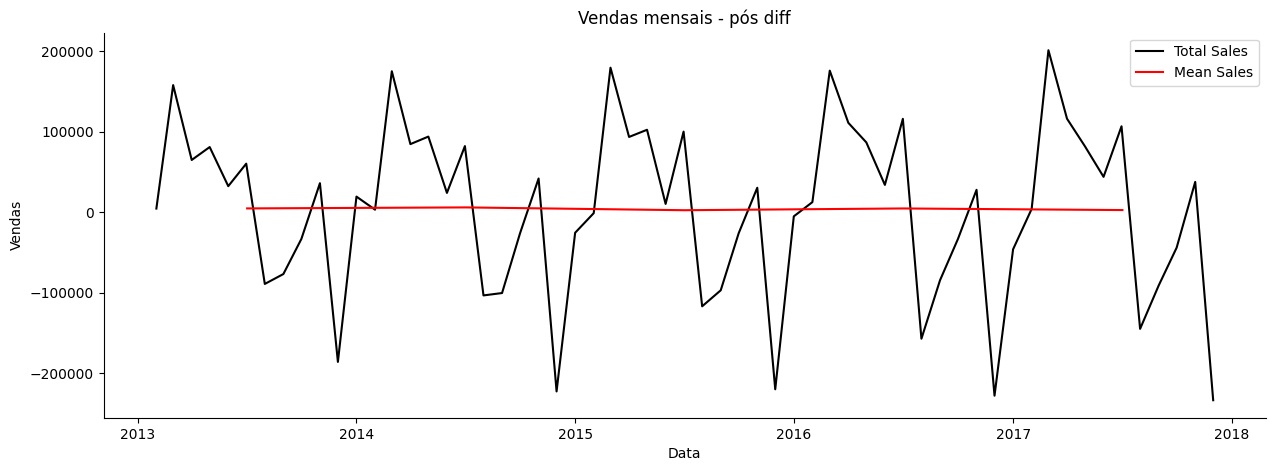

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x='date', y='sales_diff', data=df, ax=ax, color='black', label='Total Sales')

avg_df = df.groupby(df.date.dt.year)['sales_diff'].mean().reset_index()
avg_df.date = pd.to_datetime(second.date, format='%Y')
sns.lineplot(x=(second.date + datetime.timedelta(6*365/12)), y='sales_diff', data=avg_df, ax=ax, color='red', label='Mean Sales')   

ax.set(xlabel = "Data", ylabel = "Vendas", title = 'Vendas mensais - pós diff')
sns.despine()

plt.savefig('images/vendas_mensais_pos_diff.png', format='png')

In [ ]:

dftest = adfuller(df.sales, autolag = 'AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

AttributeError: 'DataFrame' object has no attribute 'sales_diff'

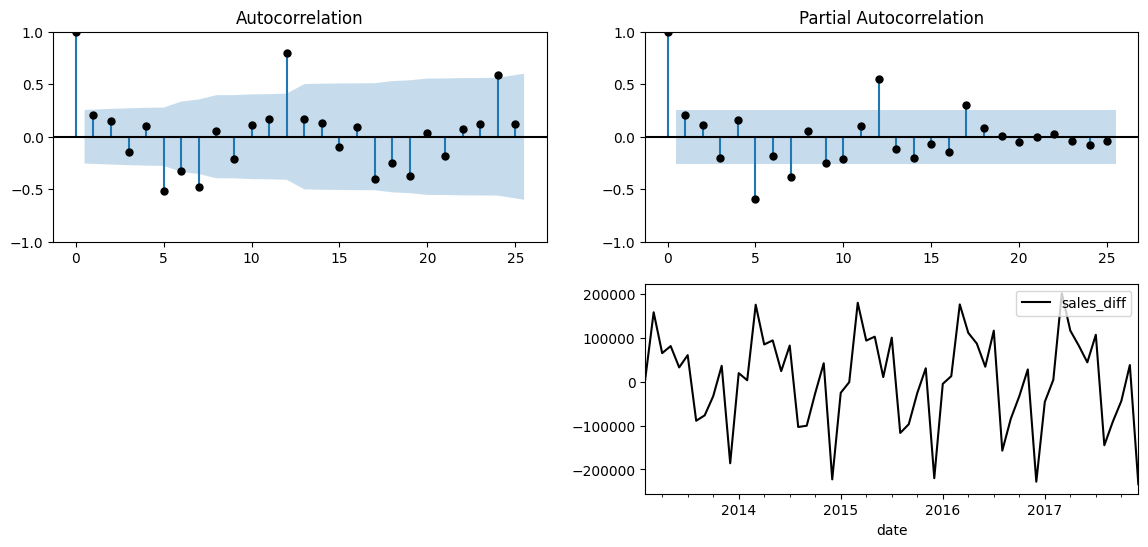

In [ ]:
# dataframe to datetime index
datetime_df = df.set_index('date').drop('sales', axis=1)
datetime_df.dropna(axis=0)

# split graphs among two columns
layout = (2, 2)
pacf = plt.subplot2grid(layout, (0, 1))
raw  = plt.subplot2grid(layout, (1, 1))
acf  = plt.subplot2grid(layout, (0, 0))

datetime_df.plot(ax=raw, figsize=(14, 6), color='black')
smt.graphics.plot_acf(datetime_df, lags=25, ax=acf, color='black')
smt.graphics.plot_pacf(datetime_df, lags=25, ax=pacf, color='black')

plt.savefig('images/acf_pacf.png', format='png')

dt_data = df.set_index('date').drop('sales', axis=1)
dt_data.dropna(axis=0)

dt_data.to_csv('data/processed/arima_df.csv')